# Tugas Hari 4 - Pekan 3 (Python - Data Science)
### Organized by Sanbercode
##### Nama : Fahmi Jabbar (fahmijabbar12@gmail.com)

Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=10JkPB2hhDmkVUoCGFP6gpoRL1mvx0OPf)



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://blog.sanbercode.com/wp-content/uploads/2020/05/austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

<h2>Soal 1: Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

In [7]:
# replace - => nan
dfToNan = df.replace('-', np.NaN)

# replace nan ke ffill
dfToFfill = dfToNan.fillna(method='ffill')

# To Float => DewPointAvg (F), HumidityAvg (%), TempAvg (F),dan WindAvg (MPG)
data1 = dfToFfill.DewPointAvgF.astype(float)
data2 = dfToFfill.HumidityAvgPercent.astype(float)
data3 = dfToFfill.TempAvgF.astype(float)
data4 = dfToFfill.WindAvgMPH.astype(float)

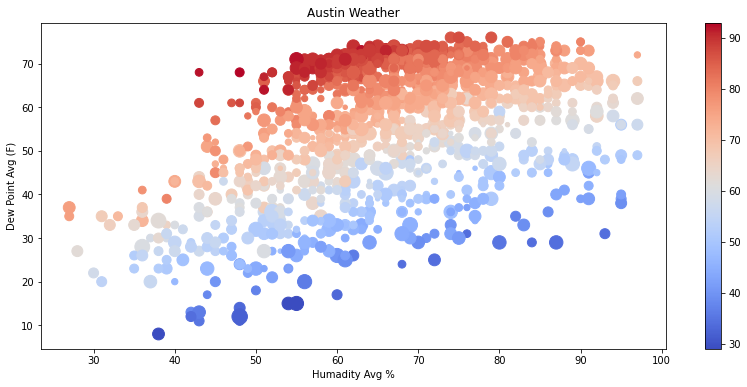

In [9]:
#Membuat plot
fig, ax = plt.subplots(figsize=(14,6))

#statement : mengamati nilai DewPointAvg (F) dengan mengamati nilai HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)
plot = ax.scatter(data2, data1, c=data3, sizes=data4*20, cmap='coolwarm')

# color bar
fig.colorbar(plot)

# axis labeling
ax.set_xlabel('Humadity Avg %')
ax.set_ylabel('Dew Point Avg (F)')
ax.set_title('Austin Weather')

plt.show()

Bila kita perhatikan, pada sumbu x ada persentase kelembaban. Pada sumbu y ada tempratur titik embun. Lalu warna yang diterapkan berdasarkan pada tempratur rata-rata dan ukuran scatter plot berdasarkan kecepatan angin.

Pada kelembaban dibawah sekitar 40% titik embun terendah ada pada kisaran 10F dan titik embun tertinggi ada pada kisaran 45F, kecepatan angin pun tidak terlalu besar(dilihat dari besarnya scatter plot). Tempratur rata rata terendah sekitar 30F dan tertinggi 65F. Ini boleh jadi melambangkan musim dingin

Pada kelembaban diatas 40% - 60% titik embun terendah ada pada kisaran 15F dan tertinggi pada kisaran 70F, kecepatan angin ada yang mulai membesar. Tempratur rata-rata terendah sekitar 38F dan tertinggi sekitar 85F. Ini boleh jadi melambangkan musim semi atau musim gugur.

Diatas 60% titik embun terendah mulai naik diatas 20F dan tertinggi mencapai lebih dari 70F, kecepatan angin bervariasi antara yang besar dan kecil. Tempratur rata-rata terendah sekitar 48F dan tertinggi 90F. Ini boleh jadi melambangkan musim panas.

Saya meyakini bahwa tujuan dari mapping cuaca di kota Austin ini bertujuan untuk merepresentasikan Tempratur Titik embun, Tempratur rata-rata, dan Kecepatan angin pada setiap level persentase kelembaban. 

---

![alt text](https://drive.google.com/uc?id=1Pp5oIc-39mcw2vrw6xgCRM9GsvyRtPI5)

---

Downoad  <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">vgsales.csv</a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h2>Soal 2: Preparing Data</h2>

Manipulasi data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

In [12]:
genreMean = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales']].mean()
display(genreMean)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

![alt text](https://drive.google.com/uc?id=1dR4vthSt22gM_LdfSBZCMIKPL6xd7nVl)

---

<h2>Soal 3: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

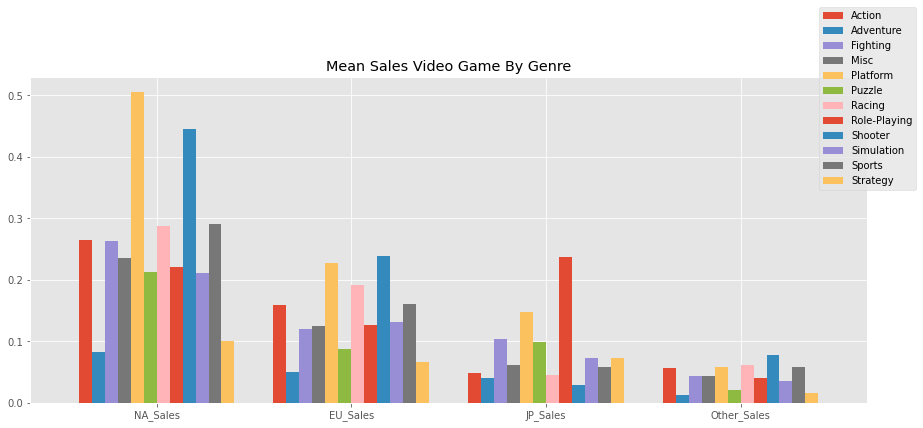

In [32]:
#Change style 
plt.style.use('ggplot')

#Transpose Index to column
transposed = genreMean.T
transposed.plot.bar(rot=0, figsize=(15, 6), width=0.8)
plt.title('Mean Sales Video Game By Genre')
plt.legend(bbox_to_anchor=(1.065, 1.23))
plt.show()

**Jawab:**

Untuk penjualan di north america, yang tertinggi adalah genre Platform (tertinggi di semua penjualan), dan terendah adalah genre Adventure

Untuk penjualan di eropa, yang tertinggi adalah genre Platform, terendah adalah Adventure

Untuk penjualan di jepang, yang tertinggi adalah genre Role-playing, terendah adalah shooter

Untuk penjualan di tempat selainnya, yang tertinggi adalah shooter, terendah adalah adventure (penjualan paling rendah di semua penjualan)

Expected Output:

![alt text](https://drive.google.com/uc?id=1A2s9Uy2i471VEYIZqMoVUIlZnVOUc8ha)

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Stack Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

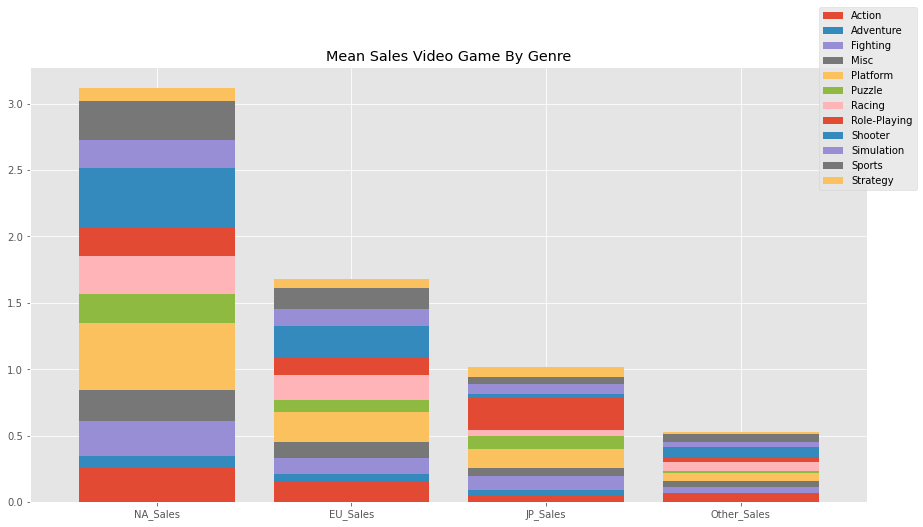

In [38]:
#Transpose Index to column
transposed = genreMean.T
transposed.plot.bar(rot=0, figsize=(15, 8), width=0.8, stacked=True)
plt.title('Mean Sales Video Game By Genre')
plt.legend(bbox_to_anchor=(1.065, 1.15))
plt.show()

**Jawab:**

Pada stacked bar chart, selain kita bisa mengenali poin poin yang saya sebutkan pada soal sebelumnya, disini kita juga bisa melihat total penjualan terbanyak ada pada north america dan yang terendah adalah pada tempat lainnya. 

Disini juga kita bisa melihat jelas porsi dari setiap genre pada suatu benua dan hasil penelaahannya sama dengan bar graph (unstacked)

Expected Output:

![alt text](https://drive.google.com/uc?id=1_yis-3aZsEbsk68tpoPHoNlFftaz2GrO)